In [ ]:
!pip install sentence-transformers

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [ ]:
wocka = pd.read_csv('/content/wocka_clean_01.csv')
wocka = wocka.iloc[:, :4]

In [ ]:
wocka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10014 non-null  int64 
 1   body      10006 non-null  object
 2   category  10014 non-null  object
 3   title     10014 non-null  object
dtypes: int64(1), object(3)
memory usage: 313.1+ KB


In [ ]:
wocka_cleaned = wocka[~wocka['body'].isnull()]

In [ ]:
wocka_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10006 entries, 0 to 10013
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10006 non-null  int64 
 1   body      10006 non-null  object
 2   category  10006 non-null  object
 3   title     10006 non-null  object
dtypes: int64(1), object(3)
memory usage: 390.9+ KB


In [ ]:
wocka['category'].value_counts()

,count
category,
Other / Misc,2301
Men / Women,925
One Liners,917
Animal,656
Children,605
Yo Momma,600
Blond,598
Puns,457
Religious,402


In [ ]:
wocka_cleaned['category'].replace("Yo Momma", "Yo Mama", inplace=True)

<ipython-input-8-3e232e61982e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wocka_cleaned['category'].replace("Yo Momma", "Yo Mama", inplace=True)
<ipython-input-8-3e232e61982e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wocka_cleaned['category'].replace("Yo Momma", "Yo Mama", inplace=True)


In [ ]:
wocka_cleaned['category'].value_counts()


,count
category,
Other / Misc,2298
Men / Women,924
One Liners,917
Animal,656
Children,605
Yo Mama,603
Blond,598
Puns,457
Religious,401


In [ ]:
wocka_cleaned['category'].replace("Blond", "Blonde", inplace=True)


<ipython-input-10-d46074f4f793>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wocka_cleaned['category'].replace("Blond", "Blonde", inplace=True)
<ipython-input-10-d46074f4f793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wocka_cleaned['category'].replace("Blond", "Blonde", inplace=True)


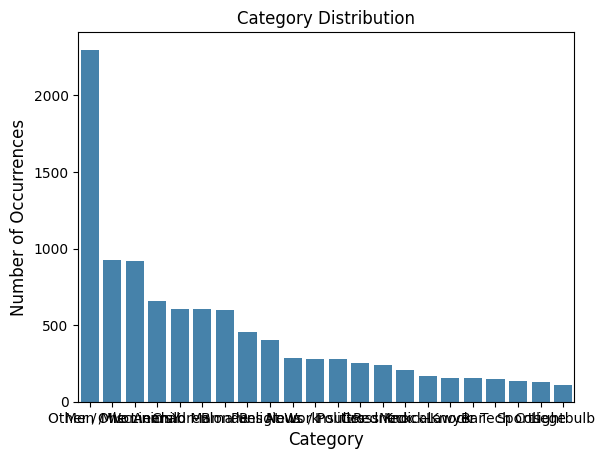

In [ ]:
x = wocka_cleaned['category'].value_counts()
sns.barplot(x=x.index, y=x.values, alpha=0.9)
plt.title('Category Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [ ]:
df = wocka_cleaned[wocka_cleaned['category'] != 'Other / Misc']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7708 entries, 0 to 10013
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7708 non-null   int64 
 1   body      7708 non-null   object
 2   category  7708 non-null   object
 3   title     7708 non-null   object
dtypes: int64(1), object(3)
memory usage: 301.1+ KB


In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['body'], df['category'], test_size=0.2, random_state=42)

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight, fast model

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
train_embeddings = model.encode(train_texts.tolist())
test_embeddings = model.encode(test_texts.tolist())

print("Train Embeddings Shape:", train_embeddings.shape)  # (num_samples, embedding_dim)

Train Embeddings Shape: (6166, 384)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression on embeddings
clf = LogisticRegression()
clf.fit(train_embeddings, train_labels)

# Predict categories
pred_labels = clf.predict(test_embeddings)

# Evaluate
print(classification_report(test_labels, pred_labels))

                 precision    recall  f1-score   support

         Animal       0.57      0.68      0.62       131
        At Work       0.49      0.41      0.45        56
            Bar       0.70      0.61      0.66        31
         Blonde       0.92      0.91      0.92       127
       Children       0.57      0.74      0.65       115
        College       0.62      0.30      0.40        27
          Gross       0.55      0.18      0.27        62
        Insults       0.65      0.31      0.42        54
    Knock-Knock       1.00      0.87      0.93        31
         Lawyer       0.81      0.74      0.77        34
      Lightbulb       0.95      0.90      0.92        20
        Medical       0.72      0.59      0.65        49
    Men / Women       0.57      0.75      0.65       174
News / Politics       0.55      0.56      0.55        52
     One Liners       0.45      0.62      0.52       178
           Puns       0.33      0.17      0.23        93
        Redneck       0.89    

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model on embeddings
clf = SVC(kernel='linear')  # You can try different kernels as well (e.g., 'rbf', 'poly')
clf.fit(train_embeddings, train_labels)

# Predict categories
pred_labels = clf.predict(test_embeddings)

# Evaluate
print(classification_report(test_labels, pred_labels))


                 precision    recall  f1-score   support

         Animal       0.58      0.72      0.64       131
        At Work       0.43      0.39      0.41        56
            Bar       0.69      0.71      0.70        31
         Blonde       0.94      0.89      0.91       127
       Children       0.57      0.77      0.65       115
        College       0.57      0.30      0.39        27
          Gross       0.61      0.23      0.33        62
        Insults       0.68      0.31      0.43        54
    Knock-Knock       1.00      0.87      0.93        31
         Lawyer       0.82      0.82      0.82        34
      Lightbulb       0.83      0.95      0.88        20
        Medical       0.79      0.61      0.69        49
    Men / Women       0.59      0.73      0.65       174
News / Politics       0.55      0.52      0.53        52
     One Liners       0.47      0.60      0.52       178
           Puns       0.30      0.17      0.22        93
        Redneck       0.94    

In [ ]:
# Only Jokes with known terms like Yo Mama or Knock Knock have high accuracy, the others need a deeper level of learning like Puns and One Liners